In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

# Распределения и ЦПТ

Простыми словами, ЦПТ говорит о том, что нам совсем не важно по какому закону распределена независимая случайная величина — распределение средних значений (или сумм) её выборок будет асимптотически стремиться к нормальному. (За некоторыми исключениями, например, распределение Коши.)

**Если дисперсия распределения конечна, то ЦПТ работает.**

Лучше один раз увидеть чем 100 раз услышать; я хочу глазами убедиться, что она работает.

## Распределения

Для примера, генерирую пять распределений:
1. Нормальное
2. Логнормальное
3. Экспоненциальное
4. Равномерное
5. Распределение Коши

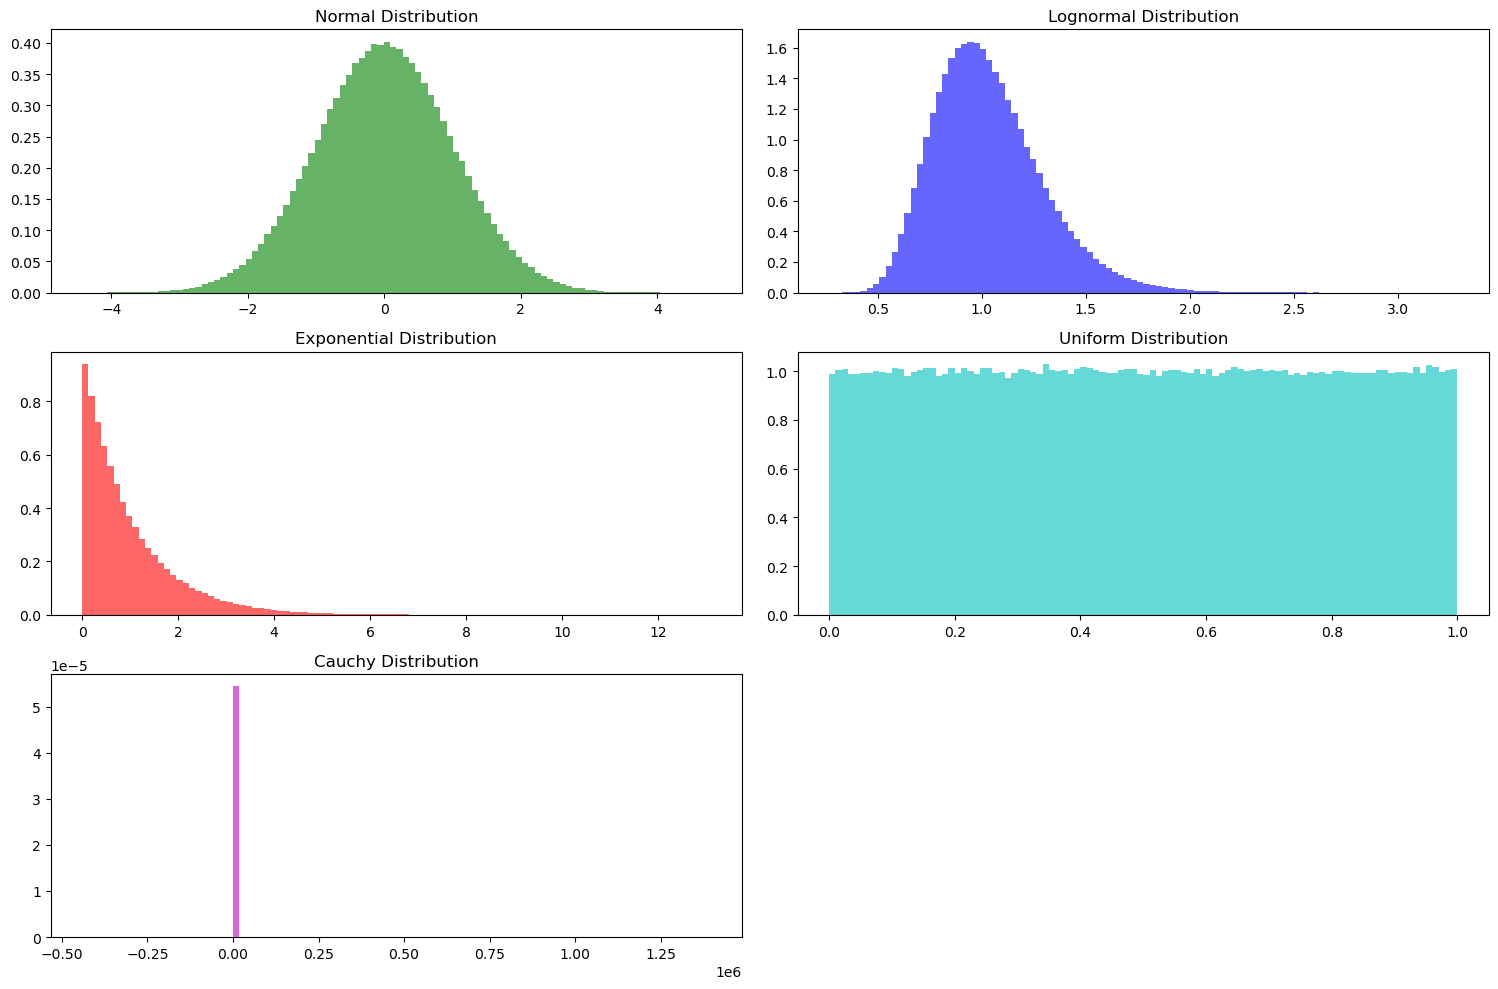

In [2]:
sample_size = 1_000_000 # Будет считаться очень долго, можно снизить на порядок
bins = 100

# Нормальное распределение
mean_normal = 0
std_dev_normal = 1
normal_data = np.random.normal(mean_normal, std_dev_normal, sample_size)

# Логнормальное распределение
mean_lognormal = 0
sigma_lognormal = 0.25
lognormal_data = np.random.lognormal(mean_lognormal, sigma_lognormal, sample_size)

# Экспоненциальное распределение
lambda_exponential = 1
exponential_data = np.random.exponential(1/lambda_exponential, sample_size)

# Равномерное распределение
uniform_start = 0
uniform_end = 1
uniform_data = np.random.uniform(uniform_start, uniform_end, sample_size)

# Распределение Коши
loc_cauchy = 0
scale_cauchy = 1
cauchy_data = np.random.standard_cauchy(sample_size)

# Визуализация
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(normal_data, bins=bins, density=True, alpha=0.6, color='g')
plt.title('Normal Distribution')

plt.subplot(3, 2, 2)
plt.hist(lognormal_data, bins=bins, density=True, alpha=0.6, color='b')
plt.title('Lognormal Distribution')

plt.subplot(3, 2, 3)
plt.hist(exponential_data, bins=bins, density=True, alpha=0.6, color='r')
plt.title('Exponential Distribution')

plt.subplot(3, 2, 4)
plt.hist(uniform_data, bins=bins, density=True, alpha=0.6, color='c')
plt.title('Uniform Distribution')

plt.subplot(3, 2, 5)
plt.hist(cauchy_data, bins=bins, density=True, alpha=0.6, color='m')
plt.title('Cauchy Distribution')
#plt.xlim(-10, 10)  # Ограничение по оси X для лучшей видимости

plt.tight_layout()
plt.show()

### Примеры IRL

Я обратился к ~~богам~~ карманному галлюционирующему но безотказному Эйнштейну (gpt-4o), и вот пример данных, которые распределены по этим законам:

**Нормальное распределение:**
* Рост или вес людей в определенной популяции.
* Оценки студентов по крупномасштабному тесту (например, SAT).
* Измерения массы от производственной линии, когда процесс хорошо контролируется.

**Логнормальное распределение:**
* Доходы индивидуумов в экономике.
* Время выполнения задачи, когда задача состоит из последовательности операций с мультипликативным эффектом.
* Размер частиц в геологии и материаловедении.

**Экспоненциальное распределение:**
* Время ожидания между вспышками сверхновых в галактике.
* Интервалы между поступлениями заявок для компании.
* Время жизни радиоактивного атома до распада.

**Равномерное распределение:**
* Время прибытия поезда, если он ходит ровно по расписанию.
* Выбор случайного места на окружности (например, случайное направление ветра).
* Лотерейные шары, если они равновероятны.

**Распределение Коши:**
* Измерения случайных эффектов, которые не следуют нормальному распределению.
* Резонансные пики в физике (например, интенсивность света в спонтанной эмиссии).
* Данные, содержащие "взрывные" значения или выбросы, которые трудно моделировать нормальным распределением.

## Проверяю ЦПТ

Буду многократно генерировать выборки разных размеров из сгенерированных выше распределений, строить распределения средних, и смотреть, работает ли ЦПТ на разных распределениях.

Ожидаю, что ЦПТ работает на всех выборках, кроме выборок размером в 1 шт. *(а ещё кроме выборок размером с популяцию, но тогда это уже не выборка, ~~не души~~.)*

И что ЦПТ не работает на распределении Коши.

In [3]:
# Размеры и кол-во выборок
# 1 — чтобы показать что не работает; 2 — для вау эффекта; 30 — дань предкам; 100 — кругленько; 1000 — солидно.
sample_sizes = [1, 2, 30, 100, 1000] 
num_samples = 10_000

Важно: код "оптимизирован" под читаемость человеком с ограниченным скиллом (мной). Мб можно сделать более быстрый алгоритм, но сейчас такой задачи нет. *(Кстати, такая задача есть у Глеба, покупайте его курсы!)*

### Нормальное распределение

5it [22:38, 271.72s/it]


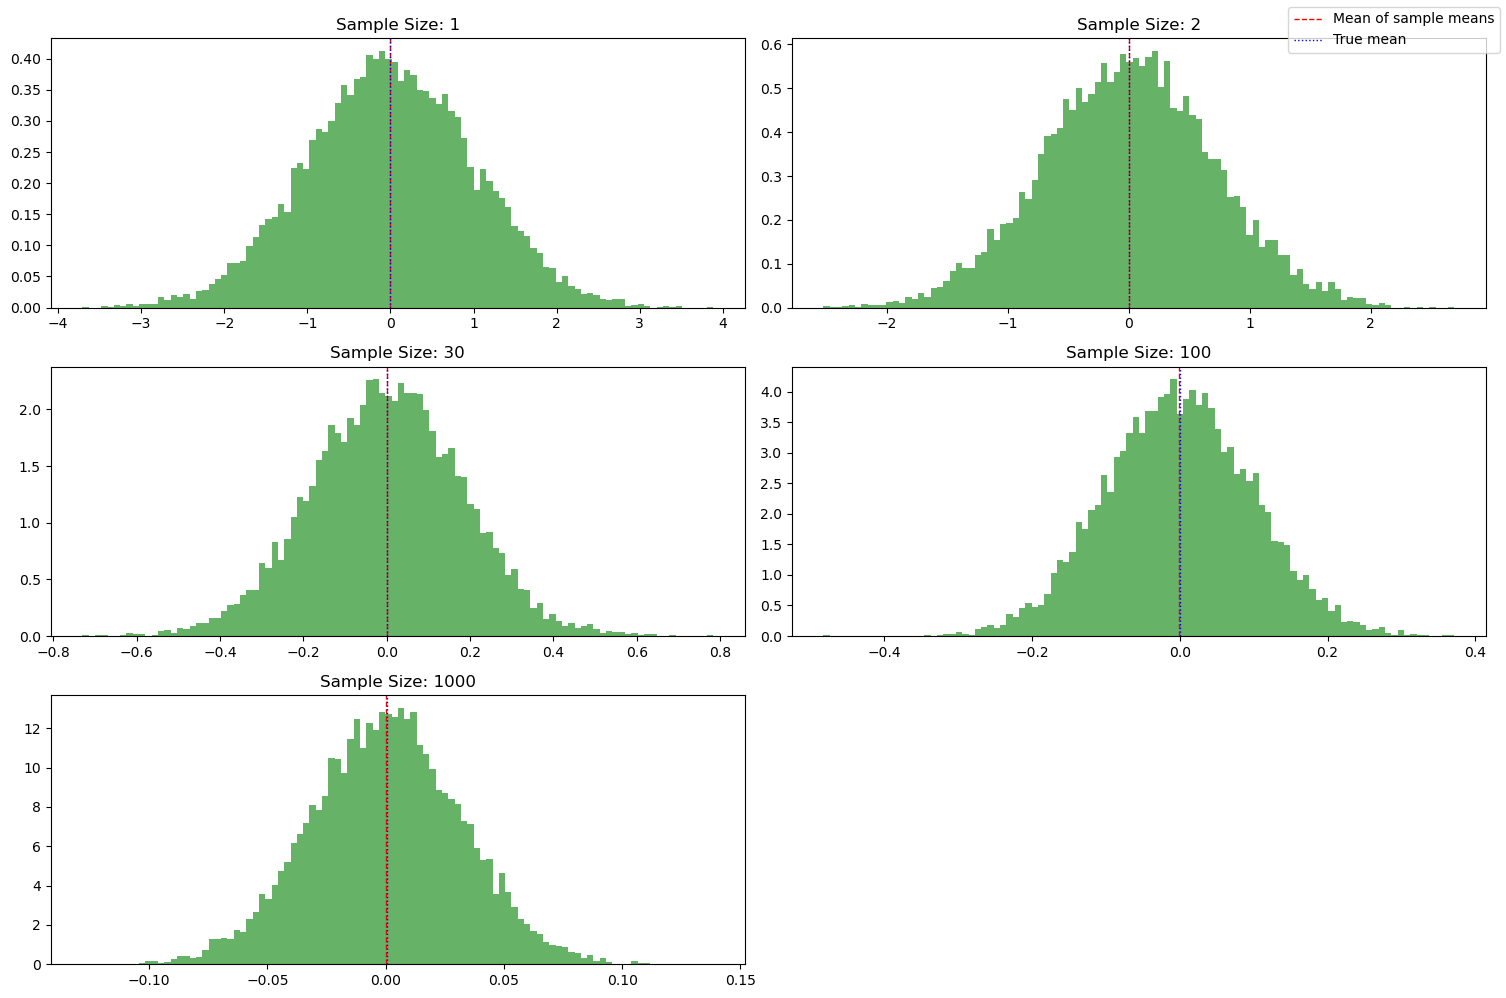

In [4]:
# Нормальное распределение

plt.figure(figsize=(15, 10))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(normal_data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
      
    # Визуализация распределения средних
    plt.subplot(3, 2, i + 1)
    plt.hist(sample_means, bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Sample Size: {sample_size}')

    # Добавить вертикальную линию для среднего значения
    mean_of_sample_means = np.mean(sample_means)
    plt.axvline(mean_of_sample_means, color='r', linestyle='dashed', linewidth=1, label='Mean of sample means')
    plt.axvline(normal_data.mean(), color='b', linestyle='dotted', linewidth=1, label='True mean')

# Создание общей легенды
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Логнормальное распределение

5it [22:03, 264.76s/it]


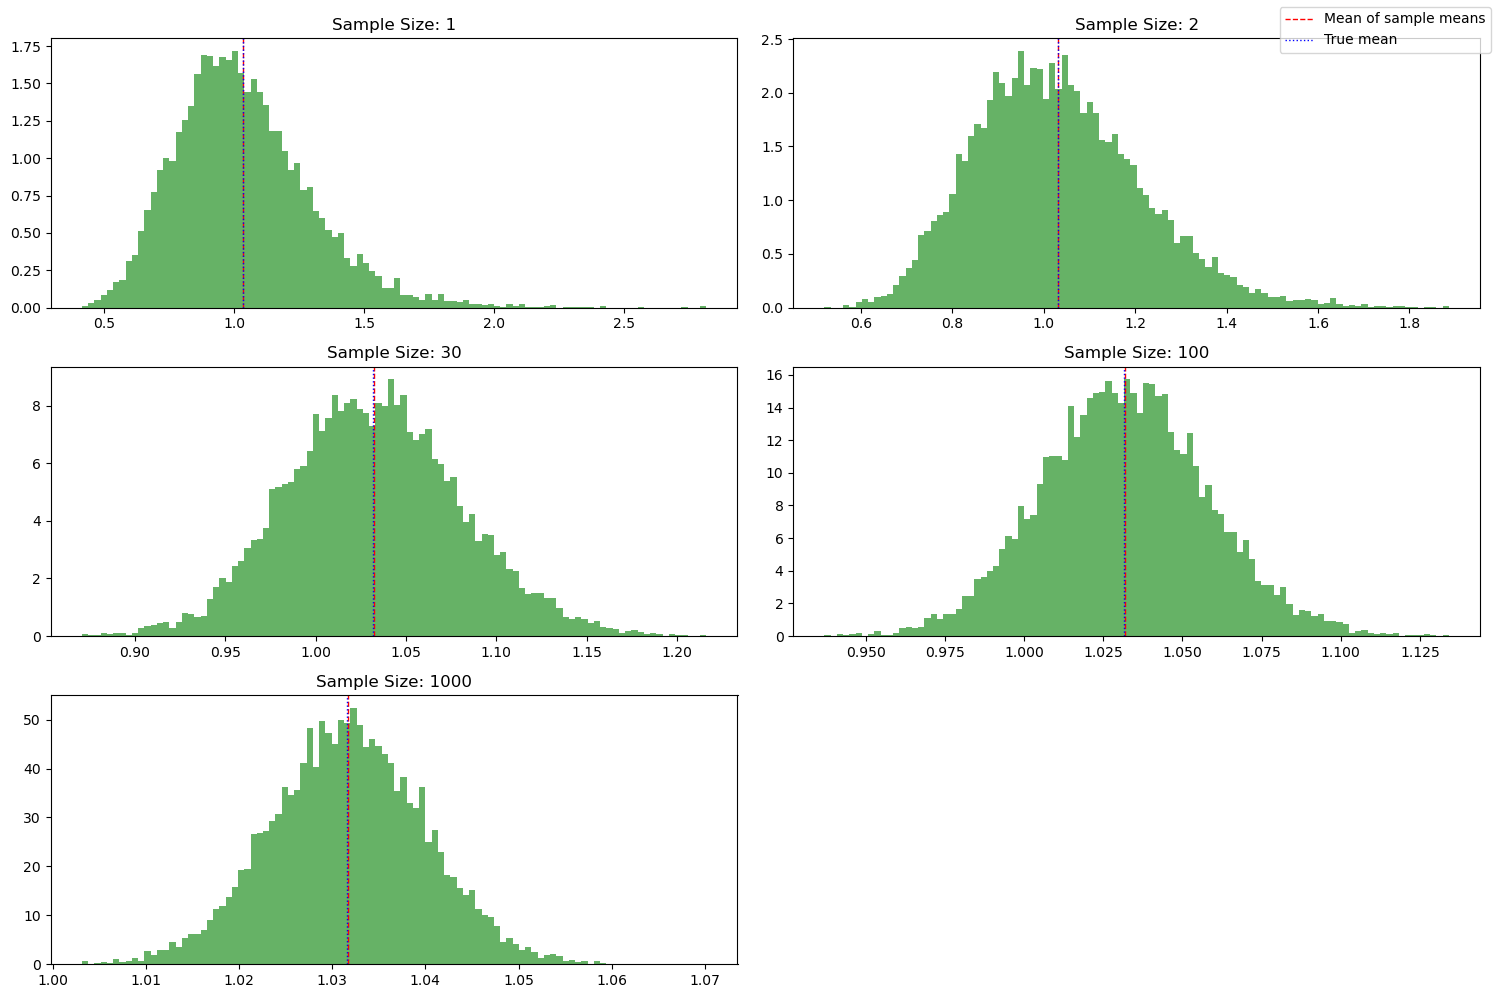

In [5]:
# Логнормальное распределение

plt.figure(figsize=(15, 10))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(lognormal_data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
      
    # Визуализация распределения средних
    plt.subplot(3, 2, i + 1)
    plt.hist(sample_means, bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Sample Size: {sample_size}')

    # Добавить вертикальную линию для среднего значения
    mean_of_sample_means = np.mean(sample_means)
    plt.axvline(mean_of_sample_means, color='r', linestyle='dashed', linewidth=1, label='Mean of sample means')
    plt.axvline(lognormal_data.mean(), color='b', linestyle='dotted', linewidth=1, label='True mean')

# Создание общей легенды
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Экспоненциальное распределение

5it [22:06, 265.37s/it]


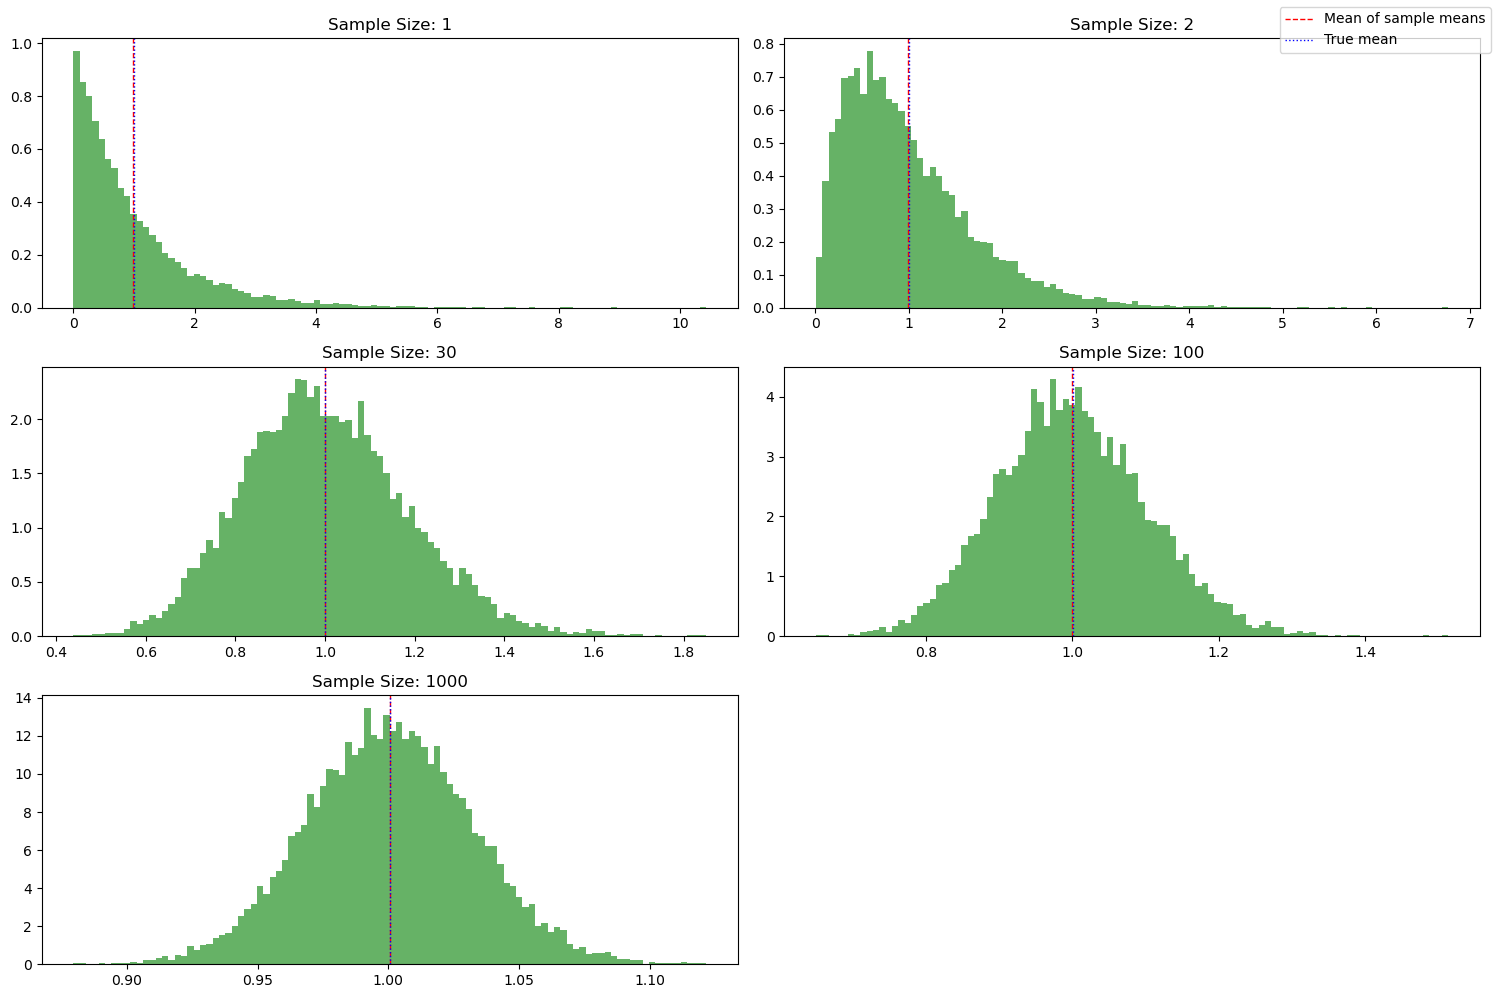

In [6]:
# Экспоненциальное распределение

plt.figure(figsize=(15, 10))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(exponential_data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
      
    # Визуализация распределения средних
    plt.subplot(3, 2, i + 1)
    plt.hist(sample_means, bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Sample Size: {sample_size}')

    # Добавить вертикальную линию для среднего значения
    mean_of_sample_means = np.mean(sample_means)
    plt.axvline(mean_of_sample_means, color='r', linestyle='dashed', linewidth=1, label='Mean of sample means')
    plt.axvline(exponential_data.mean(), color='b', linestyle='dotted', linewidth=1, label='True mean')

# Создание общей легенды
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Равномерное распределение

5it [22:04, 264.88s/it]


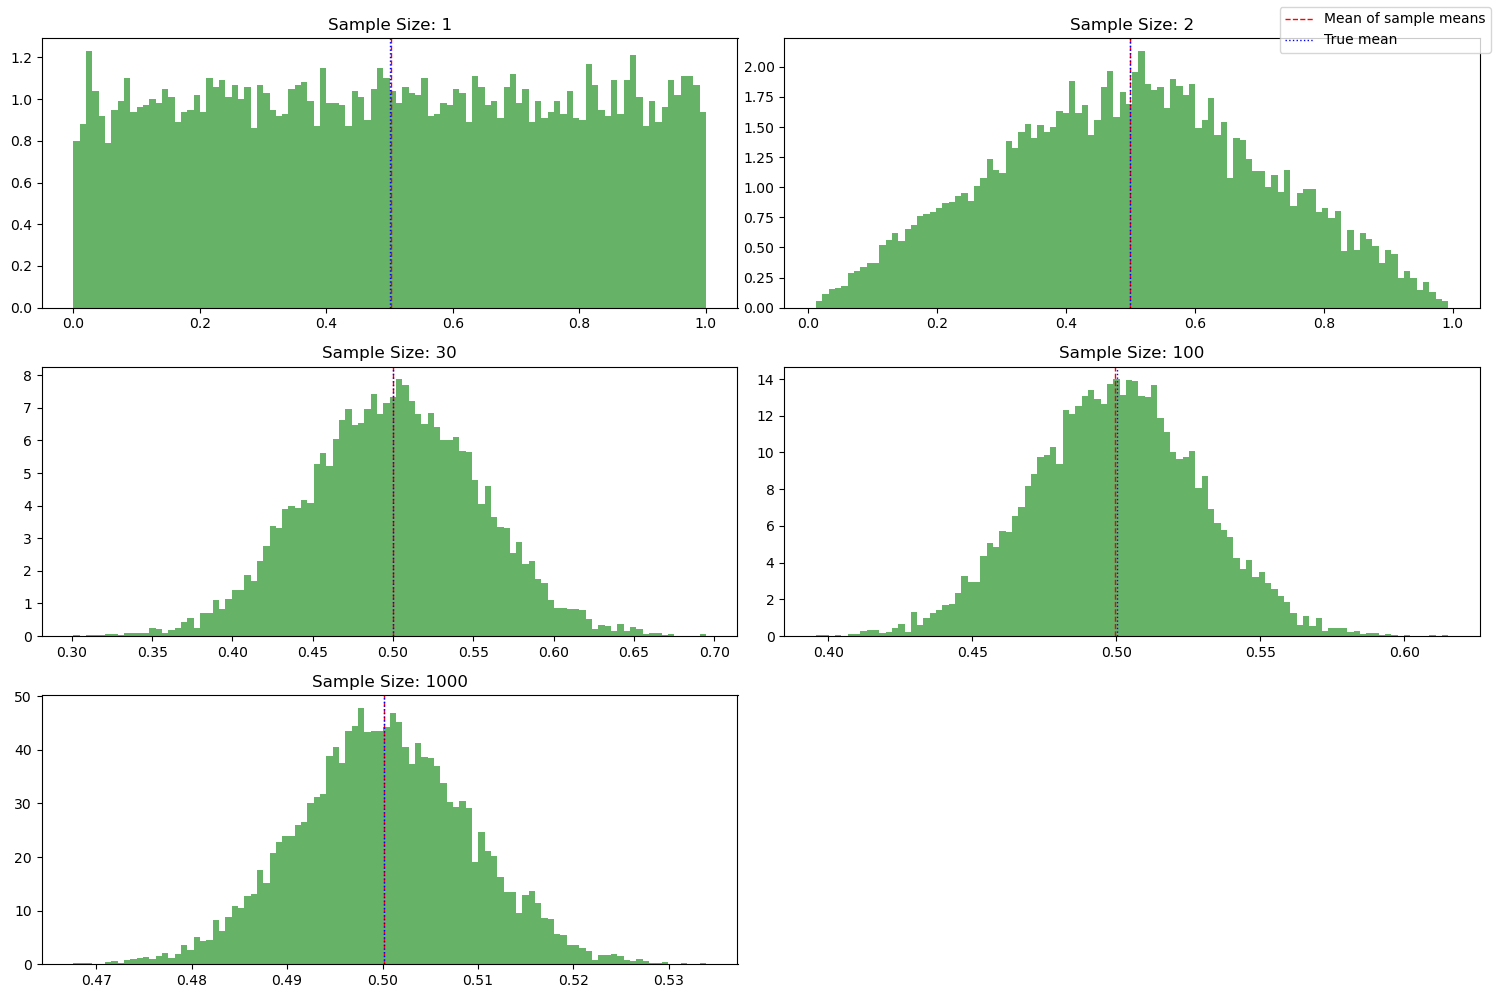

In [7]:
# Экспоненциальное распределение

plt.figure(figsize=(15, 10))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(uniform_data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
      
    # Визуализация распределения средних
    plt.subplot(3, 2, i + 1)
    plt.hist(sample_means, bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Sample Size: {sample_size}')

    # Добавить вертикальную линию для среднего значения
    mean_of_sample_means = np.mean(sample_means)
    plt.axvline(mean_of_sample_means, color='r', linestyle='dashed', linewidth=1, label='Mean of sample means')
    plt.axvline(uniform_data.mean(), color='b', linestyle='dotted', linewidth=1, label='True mean')

# Создание общей легенды
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Распределение Коши

5it [22:01, 264.37s/it]


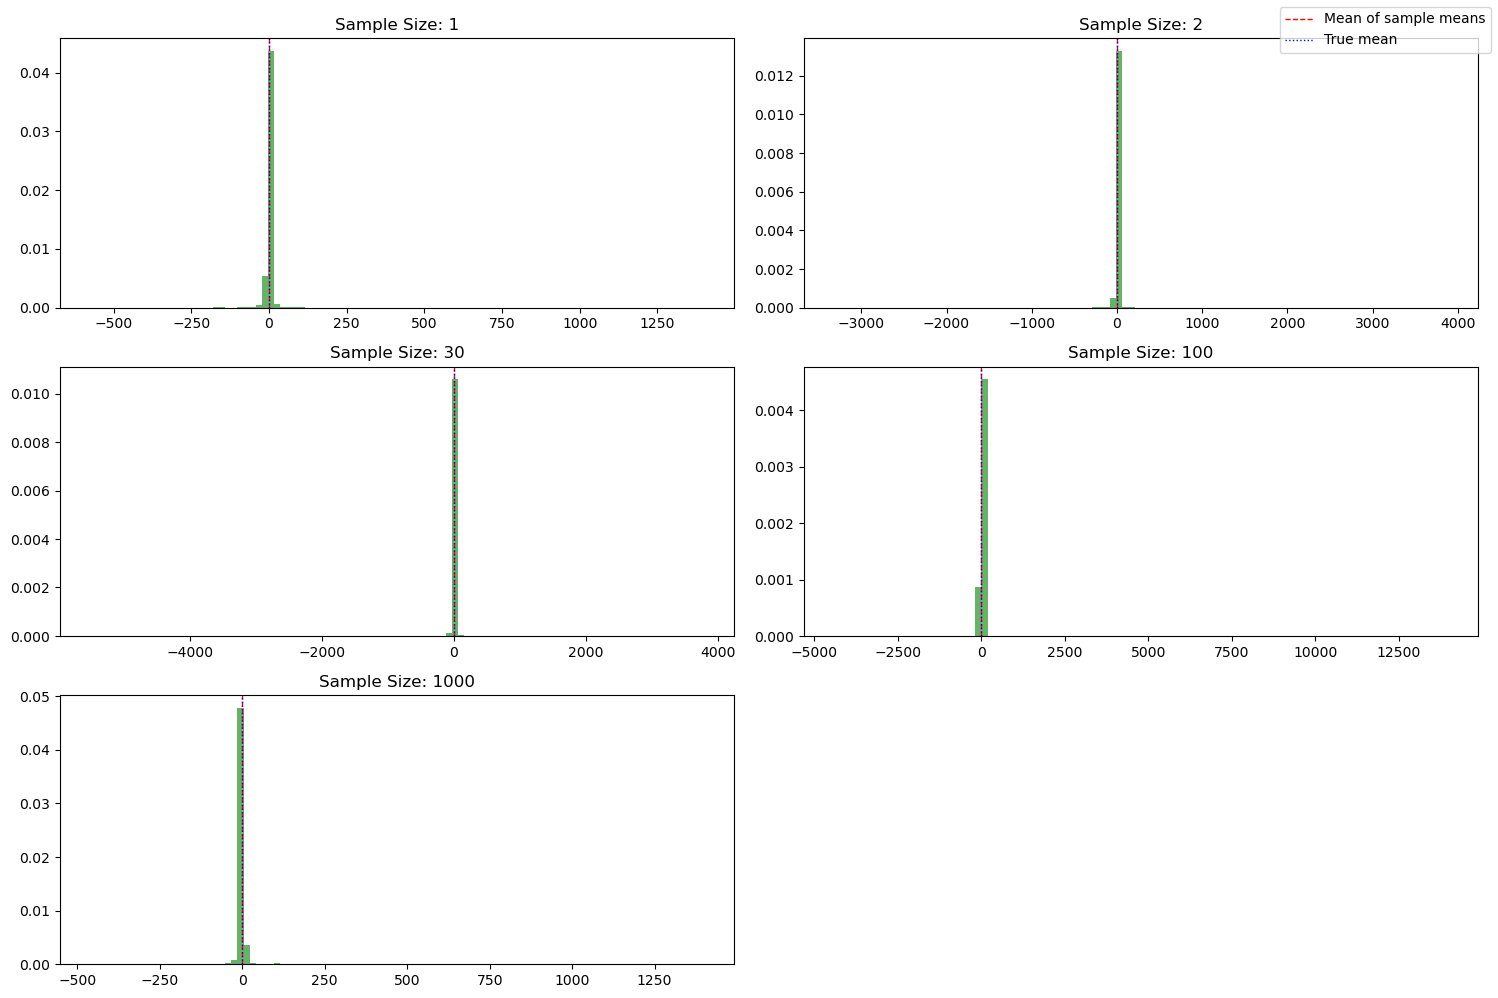

In [8]:
# Распределение Коши

plt.figure(figsize=(15, 10))

for i, sample_size in tqdm(enumerate(sample_sizes)):
    sample_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(cauchy_data, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
      
    # Визуализация распределения средних
    plt.subplot(3, 2, i + 1)
    plt.hist(sample_means, bins=bins, density=True, alpha=0.6, color='g')
    plt.title(f'Sample Size: {sample_size}')

    # Добавить вертикальную линию для среднего значения
    mean_of_sample_means = np.mean(sample_means)
    plt.axvline(mean_of_sample_means, color='r', linestyle='dashed', linewidth=1, label='Mean of sample means')
    plt.axvline(cauchy_data.mean(), color='b', linestyle='dotted', linewidth=1, label='True mean')

# Создание общей легенды
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()